<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/multi_class_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist
# data has already been divided into test and train data for us
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_data[0], train_labels[0] 

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [4]:
train_labels, len(train_labels)

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), 60000)

In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

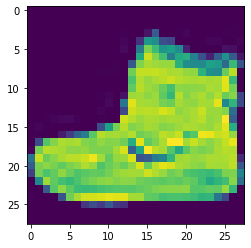

In [6]:
plt.imshow(train_data[0]) # so our first example image is of ankle boot

In [7]:
# getting one with the data
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Coat')

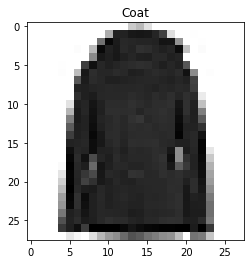

In [8]:
# plot an example and it's label
index_of_choice = 2000 
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])
# so we just created the class for better visualization for humans

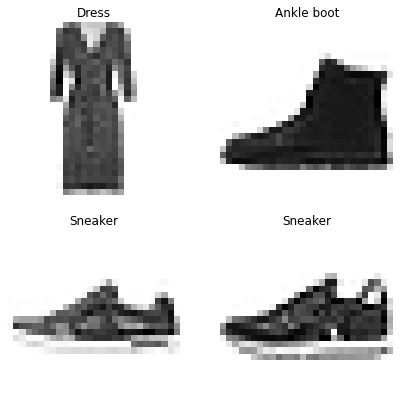

In [9]:
# plot random mutliple images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_x = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_x], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_x]])
  plt.axis(False)

In [10]:
train_data.shape

(60000, 28, 28)

note- to use the bianry cross entropy as our loss function, we need to provide one hot encoded training labels

In [11]:
# let's build the model with multiclass classification
tf.random.set_seed(42)
model = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=[28,28]),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
non_norm_history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.1743 - accuracy: 0.1589 - val_loss: 1.8119 - val_accuracy: 0.2086
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7117 - accuracy: 0.2469 - val_loss: 1.6486 - val_accuracy: 0.2857
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6347 - accuracy: 0.2801 - val_loss: 1.6078 - val_accuracy: 0.3000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6107 - accuracy: 0.2872 - val_loss: 1.6106 - val_accuracy: 0.2943
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6002 - accuracy: 0.2959 - val_loss: 1.5901 - val_accuracy: 0.3193
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5901 - accuracy: 0.3089 - val_loss: 1.5711 - val_accuracy: 0.3098
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5817 - accuracy: 0.3162 - val_loss: 1.5727 - val_accuracy:

In [12]:
train_data.min(), train_data.max() # so, we need to normalize our dataset for better prediction beacuse neural network prefers normalized data.

(0, 255)

In [13]:
# normalzong our training and test data set
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max() # so we can see here our data is normalized

(0.0, 1.0, 0.0, 1.0)

In [14]:
# let's build the model with multiclass classification
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=[28,28]),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
norm_history = model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

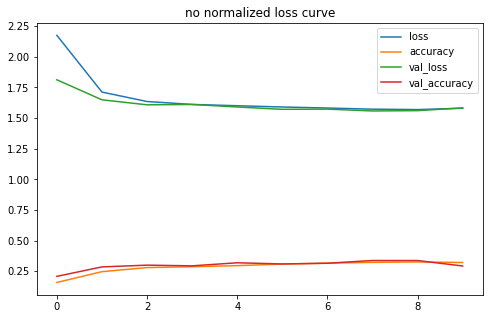

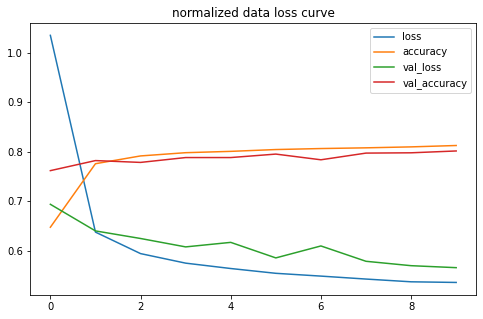

In [15]:
pd.DataFrame(non_norm_history.history).plot(title='no normalized loss curve', figsize=(8,5))
# plt.grid(True)
# plt.gca().set_ylim(0,1)
pd.DataFrame(norm_history.history).plot(title='normalized data loss curve', figsize=(8,5))

# finding the ideal learning rate

In [16]:
# ideal learning rate is the rate when our loss decreases the most
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=[28,28]),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# creating the learning rate callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

norm_history = model_3.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'ideal learning rate')

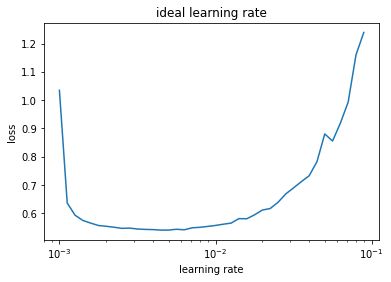

In [17]:
# Plot the learning rate decay curve
lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, norm_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('ideal learning rate')
# so in this case default learning rate of the adam optimizer is best for us. if we would have got different learning rate than 
# the default one, we woulfd have trained our model again on new learning rate.

In [21]:
y_probs = model_2.predict(test_data_norm)
y_probs

array([[2.67575434e-10, 8.36219301e-15, 4.81271964e-05, ...,
        8.82702321e-02, 6.16734102e-03, 6.32037640e-01],
       [8.12884609e-05, 5.76163584e-15, 9.49077904e-01, ...,
        5.20481797e-26, 1.70954445e-04, 7.83160132e-08],
       [1.09286033e-04, 9.96481419e-01, 9.71146363e-09, ...,
        1.49560831e-18, 3.59249341e-08, 2.74250989e-14],
       ...,
       [8.61483067e-02, 5.39734865e-05, 1.40477493e-01, ...,
        5.26902012e-15, 1.56243891e-01, 2.15783393e-06],
       [1.09144064e-04, 9.92067456e-01, 8.19268422e-08, ...,
        6.06595462e-14, 8.80336358e-07, 1.78489255e-11],
       [3.26439618e-07, 2.94177210e-10, 3.81626771e-04, ...,
        4.96945903e-02, 5.25692012e-03, 4.55987528e-02]], dtype=float32)

In [40]:
# converting all the prediction probabilities into integers
y_pred = y_probs.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 3, 1, 5])

In [43]:
model_2.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5658 - accuracy: 0.8014


[0.5658252239227295, 0.8014000058174133]

In [42]:
from sklearn.metrics import confusion_matrix
ct = confusion_matrix(test_labels,y_pred)
ct # confusion matrix for taking out some of the references about our predictions

array([[801,  11,  27,  81,   7,   1,  62,   0,  10,   0],
       [  2, 940,   2,  36,   7,   0,  13,   0,   0,   0],
       [ 34,   2, 662,  14, 166,   1, 108,   0,  13,   0],
       [ 67,  12,  12, 836,  33,   0,  28,   0,  12,   0],
       [  3,   1, 119,  44, 730,   0,  92,   0,   9,   2],
       [  0,   0,   0,   0,   0, 918,   0,  51,   7,  24],
       [205,   9, 171,  58, 141,   3, 397,   0,  16,   0],
       [  0,   0,   0,   0,   0,  44,   0, 921,   0,  35],
       [  3,   2,  34,  23,  10,  13,   7,   5, 901,   2],
       [  0,   0,   2,   0,   4,  37,   0,  47,   2, 908]])

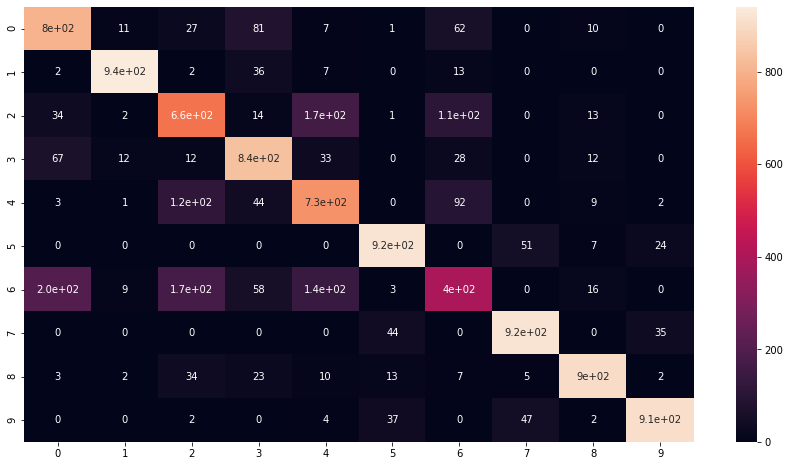

In [51]:
import seaborn as sns
plt.figure(figsize=(15,8)) # seaborn is made on top of matplotlib, so we can use this was also to adjust the figure size of the heat map
sns.heatmap(ct, annot=True)

**making single prediction**

In [72]:
# we will try to visualize random images from our data
import random
def plot_random_images(model, images, true_labels, classes):
  """
  picks a random image, plots it and labels it with prediction and truth value

  """
  # set up random integer
  i = random.randint(0, len(images))
  # let's create predictions and targets
  target_image = images[i]
  y_prob = model.predict(target_image.reshape(1,28,28)) # this is how we make single prediction.
  pred_label = classes[y_prob.argmax()]
  true_label = classes[true_labels[i]]
  plt.imshow(target_image, cmap=plt.cm.binary)
  plt.title('plotting the predicted image')
  if pred_label == true_label:
    plt.xlabel('prediction matched with the original label', color='green')
  else:
    plt.xlabel('prediction didnot match with the original label', color='red')


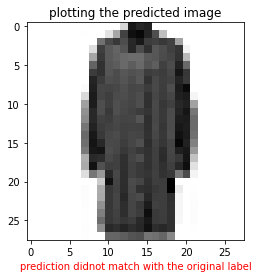

In [74]:
plot_random_images(model_2, test_data_norm, test_labels, class_names)

**seeing what patterns our model is learning**

In [75]:
model_2.layers # these are the different layers that our model is comprised of

In [76]:
# extracting a particular layer
model_2.layers[1]

In [77]:
# get the patterns of the layer
weights, biases = model_2.layers[1].get_weights()
weights, weights.shape, biases, biases.shape

(array([[ 0.38586015, -0.01683259, -0.48614603, -0.5381739 ],
        [ 0.09176365, -0.07343115, -0.27991343,  0.04825683],
        [ 0.43908143,  0.46483916, -0.6423492 , -0.4443898 ],
        ...,
        [-0.25405478,  0.53794223, -0.15410863,  0.15027727],
        [-0.23082417,  0.45491952,  0.08331461, -0.3790482 ],
        [ 0.15038271,  0.1378823 , -0.1480694 , -0.01065981]],
       dtype=float32),
 (784, 4),
 array([-0.07772543,  0.08738985, -0.36895934,  0.7236028 ], dtype=float32),
 (4,))

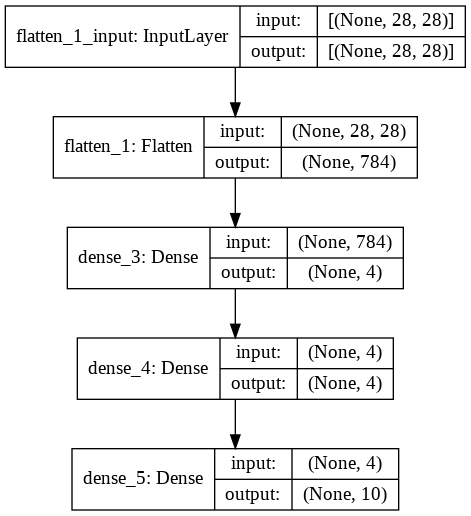

In [79]:
# viewing our model
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)